In [1]:
import pandas as pd

output = pd.read_csv("output/output-20240114-181648.csv")

In [2]:
# Want set of lengths of each column
output

,receptor_number,CDR3a,CDR3b,peptide,score,rank0,CAGASGNTGKLIF,CASSIRASYEQYF,GILGFVFTL,-0.0002981129218824208,2167
0,1,CAGSGGGSQGNLIF,CASSIRSTDTQYF,GILGFVFTL,-0.000273,2178,NaN,NaN,NaN,NaN,NaN
1,2,CALDMGGGSQGNLIF,CASSIRAADTQYF,GILGFVFTL,-0.000089,2270,NaN,NaN,NaN,NaN,NaN
2,3,CAGGGSQGNLIF,CASSIRSSYEQYF,GILGFVFTL,-0.000869,2082,NaN,NaN,NaN,NaN,NaN
3,4,CALSGETSGSRLTF,CASGLVPGGLVYEQYF,GILGFVFTL,-0.194064,1899,NaN,NaN,NaN,NaN,NaN
4,5,CALDMGGGSQGNLIF,CASSARSTDTQYF,GILGFVFTL,-0.000095,2268,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6140,2,CVVADSKLTF,CSVTGERGTDTQYF,YGFQPTNGV,-20.276680,2,NaN,NaN,NaN,NaN,NaN
6141,3,CLVPSEQAGTALIF,CSASSTHSNQPQHF,YGFQPTNGV,-20.333136,1,NaN,NaN,NaN,NaN,NaN
6142,4,CAESKRDGGATNKLIF,CASSPSREGYTF,YGFQPTNGV,-12.833920,5,NaN,NaN,NaN,NaN,NaN
6143,5,CAVDTNTDKLIF,CASSQGYEQYF,YGFQPTNGV,-14.809388,4,NaN,NaN,NaN,NaN,NaN


In [3]:
def get_lengths_of_sequence_type(column_name):
    return output[column_name].apply(lambda x : len(x)).drop_duplicates()

In [4]:
def get_character_set(column_name):
    character_dict = {}

    output[column_name].apply(lambda x : add_chars_to_dict(x, character_dict)).drop_duplicates()

    return character_dict

def add_chars_to_dict(string, dict):
    for c in string:
        if c in dict.keys():
            dict[c] += 1
        else:
            dict[c] = 1 

In [5]:
charset = list(get_character_set("peptide").keys())
charset.sort()
charset

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

The characters are everything bar $B, J, O, U, X, Z$, which agrees with online!

In [6]:
types = ["peptide", "CDR3a", "CDR3b"]
for type in types:
    print(get_lengths_of_sequence_type(type))

0        9
2820    10
Name: peptide, dtype: int64
0       14
1       15
2       12
5       16
6       17
12      13
15      11
56      18
62      19
63       9
66      10
323      8
1130    20
Name: CDR3a, dtype: int64
0      13
3      16
16     15
21     14
22     18
41     12
66     17
75     11
159    10
449    19
715     8
860    20
Name: CDR3b, dtype: int64


So then:

peptide has length $9< l < 10$

CDR3a has length $9< l < 20$

CDR3b has length $8< l < 20$

Plotting the distribution of the scores

(array([   4.,    6.,   20.,   36.,   61.,   62.,  150.,  817., 2257.,
        2732.]),
 array([-7.90280609e+01, -7.11252565e+01, -6.32224522e+01, -5.53196478e+01,
        -4.74168434e+01, -3.95140390e+01, -3.16112347e+01, -2.37084303e+01,
        -1.58056259e+01, -7.90282154e+00, -1.71660649e-05]),
 <BarContainer object of 10 artists>)

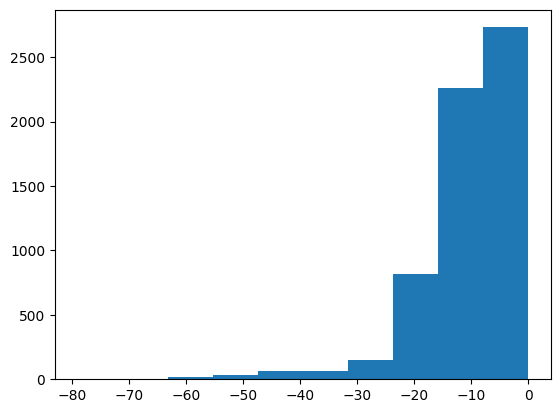

In [10]:
import matplotlib.pyplot as plt
scores = output["score"]
plt.hist(scores)

In [11]:
import numpy as np
print(np.mean(scores))
print(np.sqrt(np.var(scores)))

-10.26567156092795
9.140774104467837


(Something like a gamma distribution, or similar?)